In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Overview:
    1. starting by exploring the datasets (features, types, ..)
    2. Preliminary Data Analysis 
    3. Profit Analysis
    4. Customer Analysis
    

#### Datasets:
    1. read the data
    2. checking missing values 

In [2]:
cab_data= pd.read_csv("https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv")
city= pd.read_csv("https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv")
customer_id= pd.read_csv("https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv")
transaction_id= pd.read_csv("https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv")
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


the cab_data contains the description features (7 cols) of each transaction (Travel) for 359392 instances. Dealing with the "Date of Travel",as type integer, will be later on by creating a new feature called "Date_" as type Datetime.

In [4]:
customer_id.head()
# Customer_id contains the description of each customer

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [5]:
customer_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
customer_id['Customer ID'].astype(str)

0        29290
1        27703
2        28712
3        28020
4        27182
         ...  
49166    12490
49167    14971
49168    41414
49169    41677
49170    39761
Name: Customer ID, Length: 49171, dtype: object

In [7]:
customer_id.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


we have 49171 different Customers covered the transactions in transaction_id dataframe below. (after merging the datasets below it will be clarified)
Non-Missing values

In [8]:
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [9]:
transaction_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [10]:
transaction_id['Customer ID'].nunique()

49171

Transaction_id dataframe covered the description of each transaction (by which customer it has been made and the payment mode). this data frame could be merged with cab_data on Transaction ID and with the customer_id on Customer ID column

In [11]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [12]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [13]:
city['Users'] = city['Users'].str.replace(',', '').astype(int)


In [14]:
city['Population']=city['Population'].str.replace(',','').astype(int)


In [15]:
city['percent_users']=(city['Users']/city['Population'])*100
city.head()

,City,Population,Users,percent_users
0,NEW YORK NY,8405837,302149,3.594514
1,CHICAGO IL,1955130,164468,8.412126
2,LOS ANGELES CA,1595037,144132,9.036279
3,MIAMI FL,1339155,17675,1.319862
4,SILICON VALLEY,1177609,27247,2.313756


In [16]:
city['percent_users'].max()

33.92821689001273

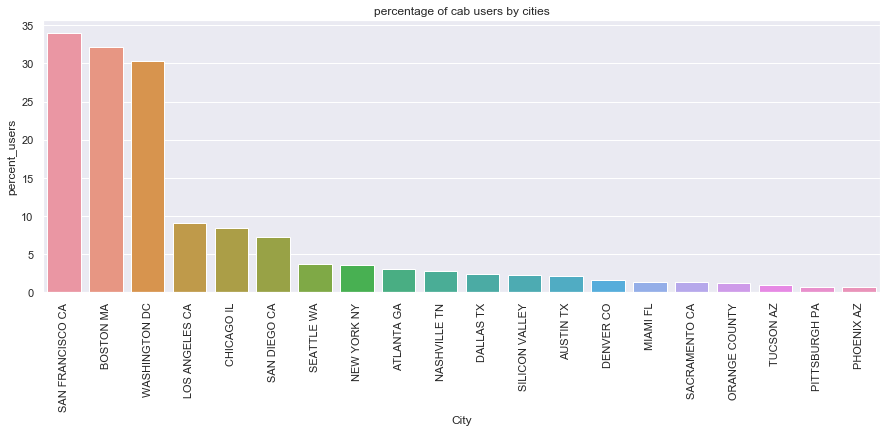

In [17]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
ax=sns.barplot(x='City',y='percent_users',data=city.sort_values('percent_users',ascending=False))
plt.title('percentage of cab users by cities')
plt.show()

city dataframe covered the cities in which the travel has been made and the population and number of cab users for each city.
#### our datasets have no missing values, but we may encounter that problem after merging the dataframes. 

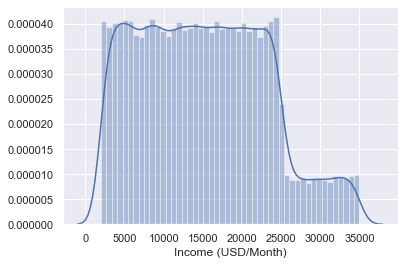

In [18]:
sns.distplot(customer_id['Income (USD/Month)'])

### Data Analysis 
creating pivot tables to take check the performance of the two companies
using cab_data dataframe to explore the profit for each company by date. dealing with outliers if necessary, then create the date columns as datetime and the Profit column.
analyse the Profit and create some visualizations to get insights and take the decision of investment 

In [19]:
cab_data.describe(include='all')

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392,359392,359392.000000,359392.000000,359392.000000
unique,NaN,NaN,2,19,NaN,NaN,NaN
top,NaN,NaN,Yellow Cab,NEW YORK NY,NaN,NaN,NaN
freq,NaN,NaN,274681,99885,NaN,NaN,NaN
mean,1.022076e+07,42964.067998,NaN,NaN,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,NaN,NaN,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,NaN,NaN,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,NaN,NaN,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,NaN,NaN,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,NaN,NaN,32.960000,583.660000,413.683200


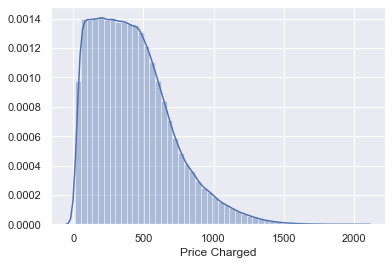

In [20]:
sns.distplot(cab_data['Price Charged'])
# the maximun price charged is 2048$ and as long as we don't have the duration of the trip we will assume this number as not an outlier

In [21]:
cab_data['Company'].value_counts()
# we have 76.4% of the trips made by yellow cabs and 23.6% by Pink Cabs

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

In [22]:
cab_data.groupby('Company')[['Price Charged','Cost of Trip']].agg([np.mean,np.median, min, max])

Price Charged                         Cost of Trip                 \
                    mean  median    min      max         mean   median   min   
Company                                                                        
Pink Cab      310.800856  298.06  15.60  1623.48   248.148682  246.330  19.0   
Yellow Cab    458.181990  425.06  20.73  2048.03   297.922004  295.596  22.8   

                   
              max  
Company            
Pink Cab    576.0  
Yellow Cab  691.2

In [23]:
cab_data['Profit']= cab_data['Price Charged'] - cab_data['Cost of Trip']
cab_data.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568


In [24]:
cab_pivot= cab_data.pivot_table(values=['Cost of Trip', 'Price Charged', 'Profit'], index='Company', aggfunc=[np.mean,np.median,min, max])

In [25]:
cab_pivot

mean                                 median                \
           Cost of Trip Price Charged      Profit Cost of Trip Price Charged   
Company                                                                        
Pink Cab     248.148682    310.800856   62.652174      246.330        298.06   
Yellow Cab   297.922004    458.181990  160.259986      295.596        425.06   

                           min                                  max  \
           Profit Cost of Trip Price Charged    Profit Cost of Trip   
Company                                                               
Pink Cab     41.5         19.0         15.60 -220.0600        576.0   
Yellow Cab  102.0         22.8         20.73 -176.9308        691.2   

                                    
           Price Charged    Profit  
Company                             
Pink Cab         1623.48  1119.480  
Yellow Cab       2048.03  1463.966

## Creating Date Freature 
    by transforming the excel ordinal "Date of Travel" feature to a Datetime feature which we will call it "Date_" then extract from the new created feature the -"year", "month", "day", and "weekday" of each trip

In [26]:
t=cab_data['Date of Travel']
t.head(5)

0    42377
1    42375
2    42371
3    42376
4    42372
Name: Date of Travel, dtype: int64

In [27]:
t.dtype

dtype('int64')

In [28]:
import sys
!{sys.executable} -m pip install xlrd

In [29]:
import xlrd
date=[]
for i in t :
    xl_date = i

    datetime_date = xlrd.xldate_as_datetime(xl_date, 0)
    date_object = datetime_date.date()
    
    date.append(date_object)


In [30]:
cab_data['Date_']=date
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Date_
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,2016-01-08
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,2016-01-06
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,2016-01-02
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,2016-01-07
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,2016-01-03


In [31]:
cab_data['Date_'].describe()

count         359392
unique          1095
top       2018-01-05
freq            2022
Name: Date_, dtype: object

In [32]:
cab_data['Date_']= pd.to_datetime(cab_data['Date_'])

In [33]:
month=cab_data.Date_.dt.month
cab_data['month']= month
cab_data['month'].head()

0    1
1    1
2    1
3    1
4    1
Name: month, dtype: int64

In [34]:
cab_data=cab_data.assign(day=cab_data.Date_.dt.day,year=cab_data.Date_.dt.year, weekday= cab_data.Date_.dt.weekday)
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Date_,month,day,year,weekday
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,2016-01-08,1,8,2016,4
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,2016-01-06,1,6,2016,2
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,2016-01-02,1,2,2016,5
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,2016-01-07,1,7,2016,3
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,2016-01-03,1,3,2016,6


In [35]:
print("max date of Travel is:" ,cab_data['Date_'].max())
print("min date of Travel is:" ,cab_data['Date_'].min())

max date of Travel is: 2018-12-31 00:00:00
min date of Travel is: 2016-01-02 00:00:00


In [36]:
weekday=cab_data['weekday'].astype(int)
weekday.head()

0    4
1    2
2    5
3    3
4    6
Name: weekday, dtype: int32

In [37]:
weekday_= cab_data['weekday'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu', 4:'Fri',5:'Sat',6:'Sun'})
weekday_.head()

0    Fri
1    Wed
2    Sat
3    Thu
4    Sun
Name: weekday, dtype: object

In [38]:
cab_data['weekday_']=weekday_
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Date_,month,day,year,weekday,weekday_
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,2016-01-08,1,8,2016,4,Fri
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,2016-01-06,1,6,2016,2,Wed
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,2016-01-02,1,2,2016,5,Sat
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,2016-01-07,1,7,2016,3,Thu
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,2016-01-03,1,3,2016,6,Sun


#### Now we can drop the "Date of Travel" feature and start exploring the data

In [39]:
print(" sum of profit made by each company among these transactions from 02/01/2016 till 31/12/2018 are :")
cab_data.groupby('Company')['Profit'].sum()
# for Pink Cab: 5 307 328 
# for Yellow Cab: 44 020 370

 sum of profit made by each company among these transactions from 02/01/2016 till 31/12/2018 are :


Company
Pink Cab      5.307328e+06
Yellow Cab    4.402037e+07
Name: Profit, dtype: float64

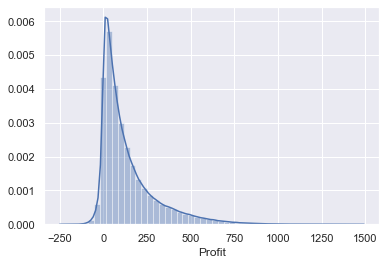

In [40]:
sns.distplot(cab_data['Profit'])
# we can see that we have a small amount of unprofitable trips where profit <= 0

### Quick Analysis of Unprofitable Trips

In [41]:
unprof_trips=cab_data[cab_data['Profit']<=0]
unprof_trips.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Date_,month,day,year,weekday,weekday_
53,10000064,42375,Pink Cab,DALLAS TX,9.45,73.43,98.280,-24.850,2016-01-06,1,6,2016,2,Wed
54,10000065,42380,Pink Cab,DALLAS TX,4.90,35.76,49.490,-13.730,2016-01-11,1,11,2016,0,Mon
55,10000066,42371,Pink Cab,DALLAS TX,13.13,122.42,149.682,-27.262,2016-01-02,1,2,2016,5,Sat
56,10000067,42371,Pink Cab,DALLAS TX,33.32,308.58,386.512,-77.932,2016-01-02,1,2,2016,5,Sat
57,10000068,42380,Pink Cab,DALLAS TX,4.52,38.31,52.884,-14.574,2016-01-11,1,11,2016,0,Mon


In [42]:
unprof_trips.describe(include='all')

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Date_,month,day,year,weekday,weekday_
count,2.482300e+04,24823.000000,24823,24823,24823.000000,24823.000000,24823.000000,24823.000000,24823,24823.000000,24823.000000,24823.000000,24823.000000,24823
unique,NaN,NaN,2,19,NaN,NaN,NaN,NaN,1091,NaN,NaN,NaN,NaN,7
top,NaN,NaN,Yellow Cab,CHICAGO IL,NaN,NaN,NaN,NaN,2017-12-01 00:00:00,NaN,NaN,NaN,NaN,Fri
freq,NaN,NaN,13692,7899,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,NaN,4433
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,1.022350e+07,42974.990614,NaN,NaN,22.467833,264.166282,283.735662,-19.569380,NaN,7.862144,15.815615,2017.044676,3.289127,NaN
std,1.242957e+05,298.988654,NaN,NaN,12.229813,148.862529,158.217211,21.293681,NaN,3.000284,8.801582,0.785501,1.933904,NaN
min,1.000006e+07,42371.000000,NaN,NaN,1.900000,15.600000,19.190000,-220.060000,NaN,1.000000,1.000000,2016.000000,0.000000,NaN
25%,1.011038e+07,42699.000000,NaN,NaN,11.990000,138.395000,149.160000,-27.436600,NaN,6.000000,8.000000,2016.000000,2.000000,NaN


In [43]:
unprof_trips.groupby(['year'])['Company'].value_counts()

year  Company   
2016  Yellow Cab    3887
      Pink Cab      3241
2017  Yellow Cab    5095
      Pink Cab      4363
2018  Yellow Cab    4710
      Pink Cab      3527
Name: Company, dtype: int64

In [44]:
tucson_az=unprof_trips[(unprof_trips['City']=='TUCSON AZ') & (unprof_trips['Profit']<= -1)]
tucson_az.groupby(['year'])['Company'].value_counts()

year  Company   
2016  Yellow Cab    57
      Pink Cab      15
2017  Yellow Cab    63
      Pink Cab      48
2018  Pink Cab      43
      Yellow Cab    42
Name: Company, dtype: int64

In [45]:
unprof_trips['Company'].value_counts()

Yellow Cab    13692
Pink Cab      11131
Name: Company, dtype: int64

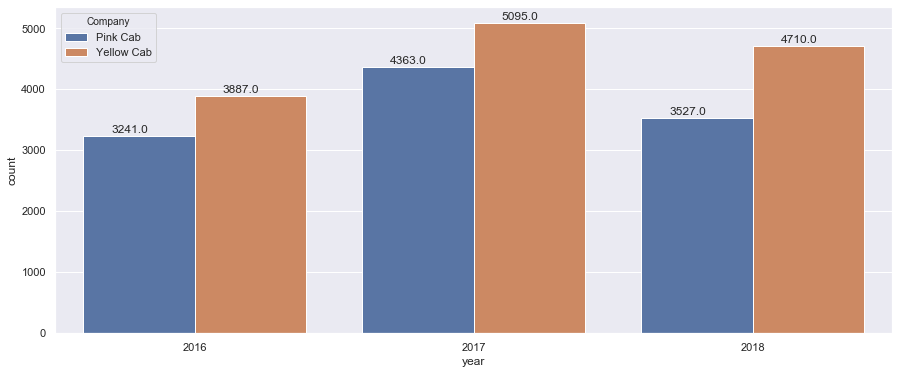

In [46]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x='year',  data=unprof_trips, hue='Company')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

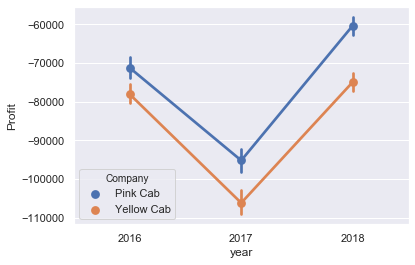

In [47]:
sns.pointplot(x="year", y="Profit", hue="Company", data=unprof_trips, estimator=sum)

In [48]:
un_tr=cab_data[cab_data['Profit']<=-50]
un_tr['Company'].value_counts()
# we can see that the nb of the trips which lost the comapny  more than 50$ are always dominant by the pink cab company

Pink Cab      1142
Yellow Cab    1133
Name: Company, dtype: int64

In [49]:
un_tr.sort_values('Profit', ascending=True).head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Date_,month,day,year,weekday,weekday_
118348,10145287,42785,Pink Cab,DALLAS TX,44.80,317.54,537.6000,-220.0600,2017-02-19,2,19,2017,6,Sun
18954,10024048,42473,Pink Cab,DALLAS TX,42.56,303.51,502.2080,-198.6980,2016-04-13,4,13,2016,2,Wed
54991,10069188,42610,Yellow Cab,TUCSON AZ,44.07,415.37,592.3008,-176.9308,2016-08-28,8,28,2016,6,Sun
23384,10029696,42494,Pink Cab,DALLAS TX,43.29,328.85,497.8350,-168.9850,2016-05-04,5,4,2016,2,Wed
115200,10141320,42765,Pink Cab,DALLAS TX,48.00,354.36,518.4000,-164.0400,2017-01-30,1,30,2017,0,Mon


### according to the unprofitable trips small analysis.  Although the yellow cabs covered 76% of trips we can clearly notice that the loss of the two comapnies is going hand in hand in numbers and in loss. the maximum in loss is about 15000 (2018), whereas the difference between the profit  is more than 13M (check the lineplot below). First thought, the yellow cabs perform better in terms of keeping their trips more likely to be profitable than the pink cabs

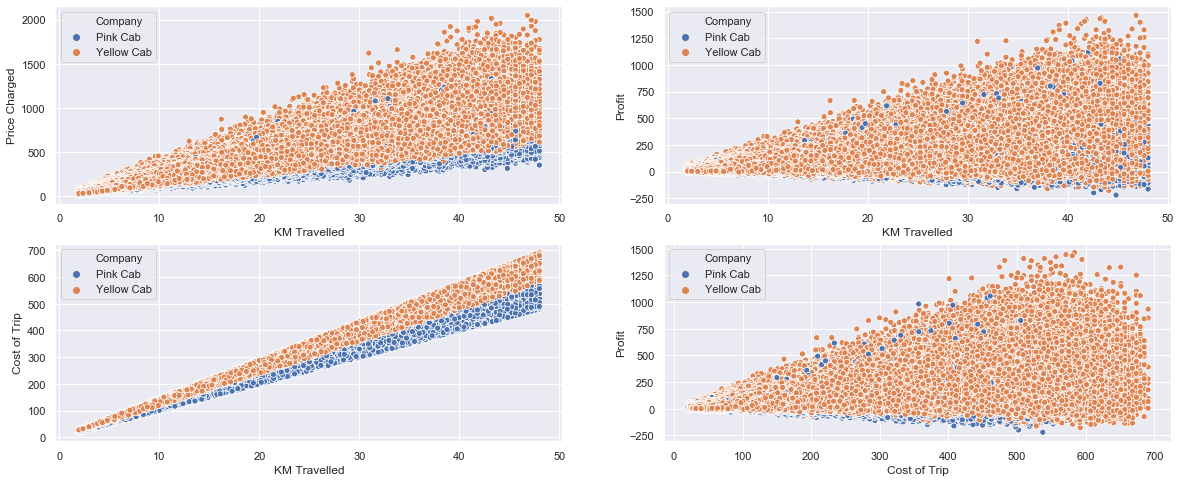

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(20, 8))
sns.scatterplot(x='KM Travelled', y='Price Charged', hue='Company', data=cab_data, ax=axes[0,0])
sns.scatterplot(x='KM Travelled', y='Cost of Trip', hue='Company', data=cab_data, ax=axes[1,0])
sns.scatterplot(x='KM Travelled', y='Profit', hue='Company', data=cab_data, ax=axes[0,1])
sns.scatterplot(x='Cost of Trip', y='Profit', hue='Company', data=cab_data, ax=axes[1,1])
# we can see the correlation between the numerical variables with the KM Travelled 

### Examining correlation between Profit, KM Traveled, Cost of Trip, Price Charged for each company

##### Pink Cab

In [51]:
pink_cabs=cab_data[cab_data['Company']=='Pink Cab']
# examinig correlation using .corr() method 
corr_ft = pink_cabs[['Profit', 'KM Travelled', 'Price Charged', 'Cost of Trip']]
corr= corr_ft.corr()
display(corr)

,Profit,KM Travelled,Price Charged,Cost of Trip
Profit,1.000000,0.442633,0.736791,0.417290
KM Travelled,0.442633,1.000000,0.927765,0.993367
Price Charged,0.736791,0.927765,1.000000,0.921896
Cost of Trip,0.417290,0.993367,0.921896,1.000000


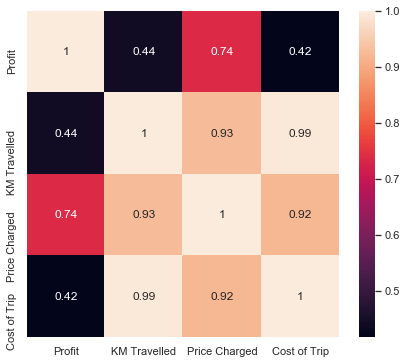

In [52]:
plt.figure(figsize=(7,6))
sns.heatmap(corr, annot=True)

##### Yellow Cab

In [53]:
yellow_cabs=cab_data[cab_data['Company']=='Yellow Cab']
# examinig correlation using .corr() method 
corr_ft = yellow_cabs[['Profit', 'KM Travelled', 'Price Charged', 'Cost of Trip']]
corr= corr_ft.corr()
display(corr)

,Profit,KM Travelled,Price Charged,Cost of Trip
Profit,1.000000,0.503152,0.870485,0.487311
KM Travelled,0.503152,1.000000,0.859709,0.993390
Price Charged,0.870485,0.859709,1.000000,0.853996
Cost of Trip,0.487311,0.993390,0.853996,1.000000


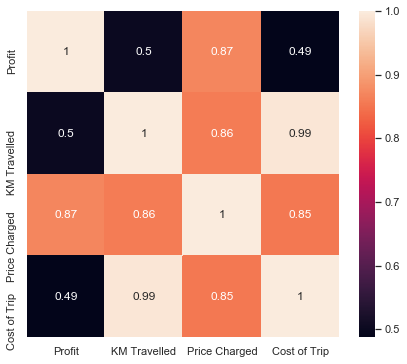

In [54]:
plt.figure(figsize=(7,6))
sns.heatmap(corr, annot=True)

#### The next 3 Barplots represents the mean of the cost, price and profit against each city for each company

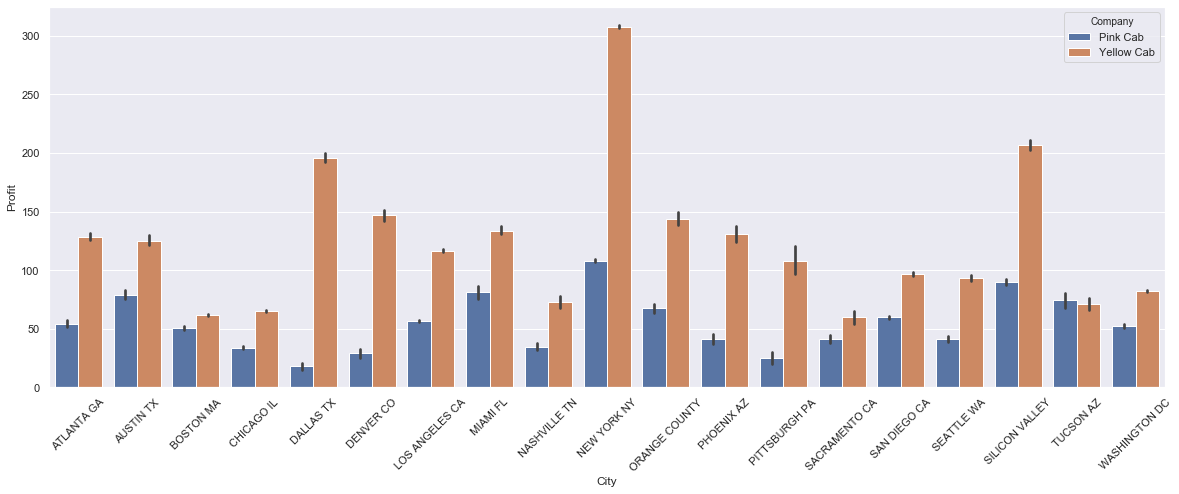

In [55]:
# The following 3 barplots represents the mean of Cost of Trip, Price Charged and Profit for each city
plt.figure(figsize=(20,7))
plt.xticks(rotation=45)

sns.barplot(x='City', y='Profit', hue='Company', data=cab_data, estimator=np.mean)


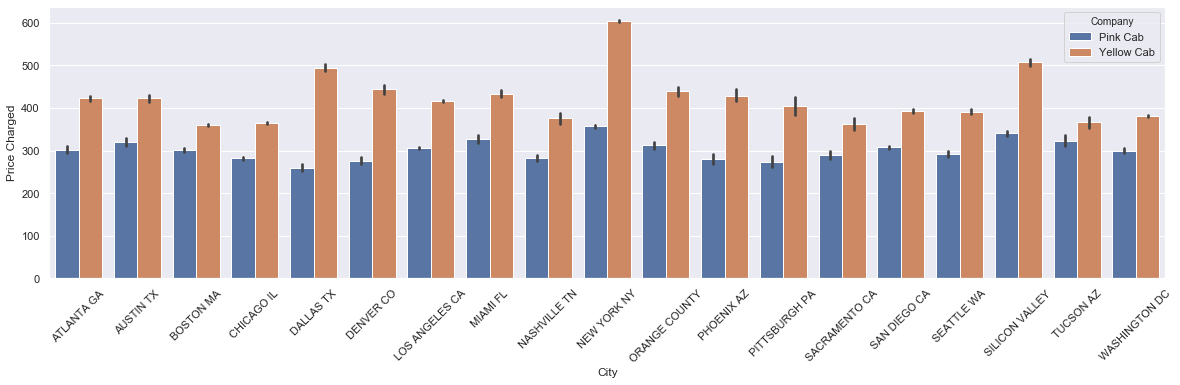

In [56]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.barplot(x='City', y='Price Charged', hue='Company', data=cab_data)

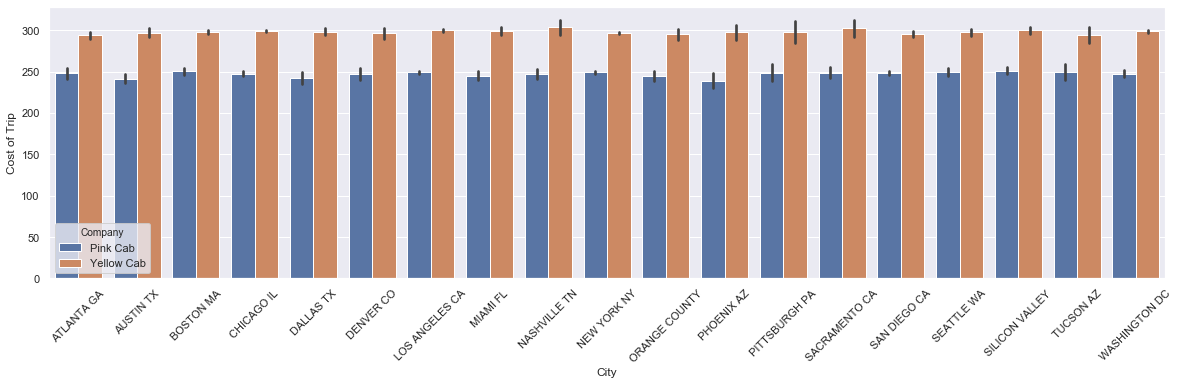

In [57]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.barplot(x='City', y='Cost of Trip', hue='Company', data=cab_data)

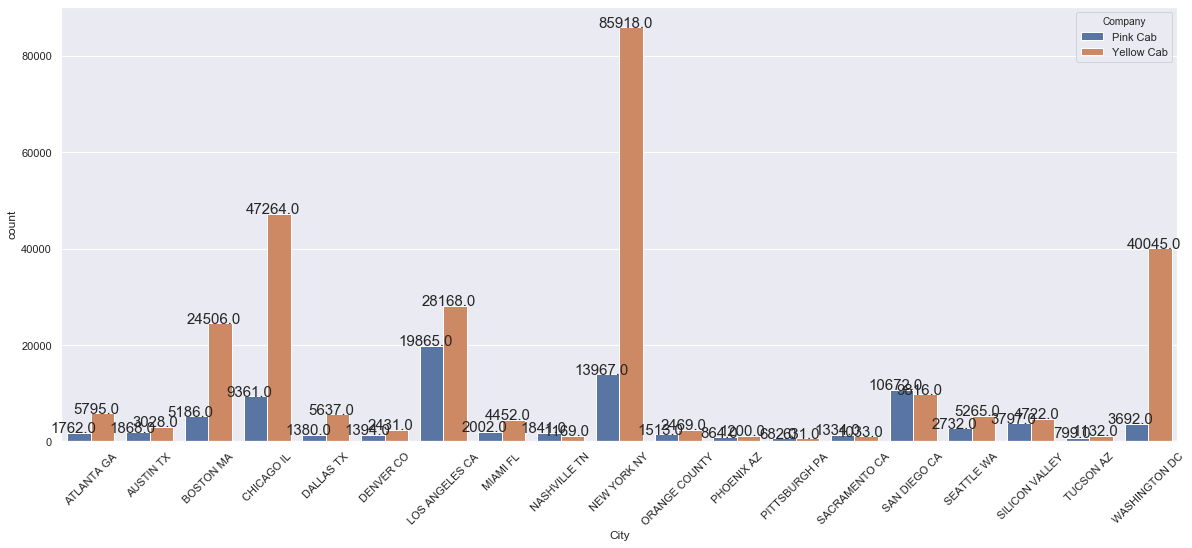

In [58]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
ax=sns.countplot(x=cab_data['City'], data=cab_data, hue='Company')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),size=15,ha='center')

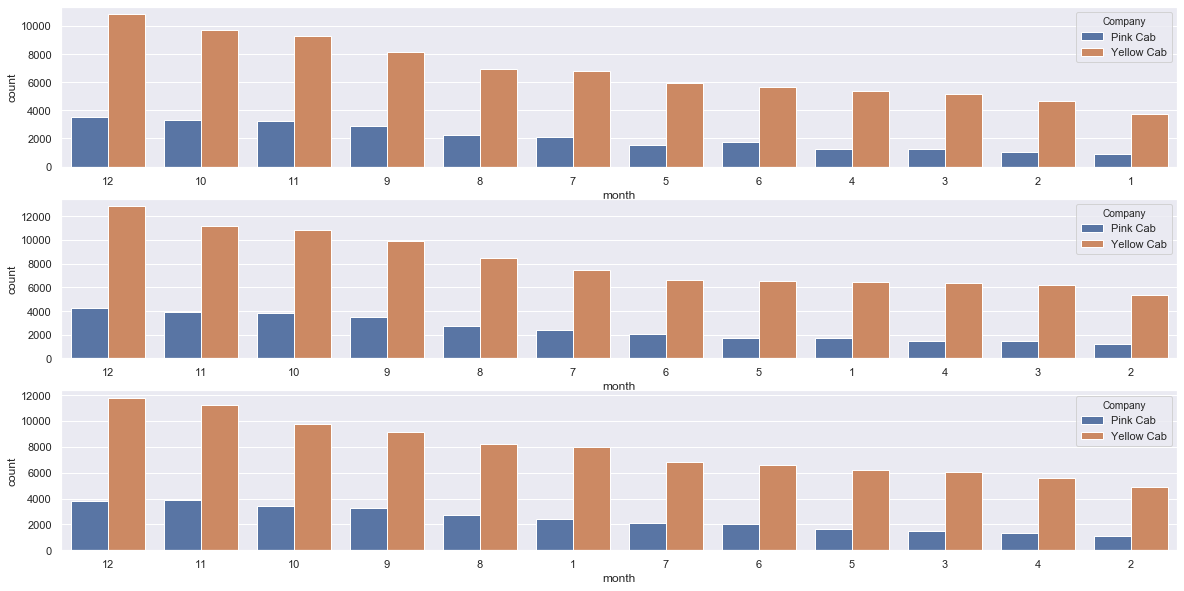

In [59]:
fig, axes = plt.subplots(3, 1, figsize=(20, 10))
sns.countplot(ax=axes[0], x='month', data=cab_data.query("year==2016"), hue='Company', order= cab_data.query("year==2016")['month'].value_counts().index)
sns.countplot(ax=axes[1], x='month', data=cab_data.query("year==2017"), hue='Company', order= cab_data.query("year==2017")['month'].value_counts().index)
sns.countplot(ax=axes[2], x='month', data=cab_data.query("year==2018"), hue='Company', order= cab_data.query("year==2018")['month'].value_counts().index)
# the CHart below shows the number of trips made by each company for each month for each year(16-17-18)

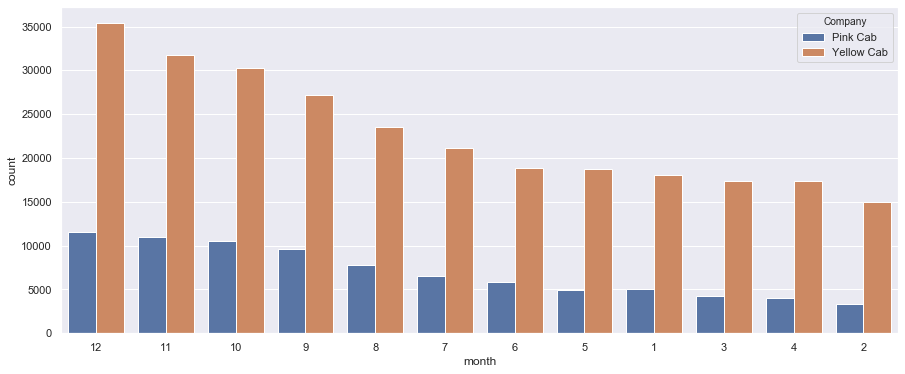

In [60]:
# the chart below represents the count of trips made by each company against months (covering 3 years()
plt.figure(figsize=(15,6))
sns.countplot(x=cab_data['month'], data=cab_data, hue='Company', order= cab_data['month'].value_counts().index)

In [61]:
cab_data.query("year==2018")['Company'].value_counts()

Yellow Cab    94253
Pink Cab      29310
Name: Company, dtype: int64

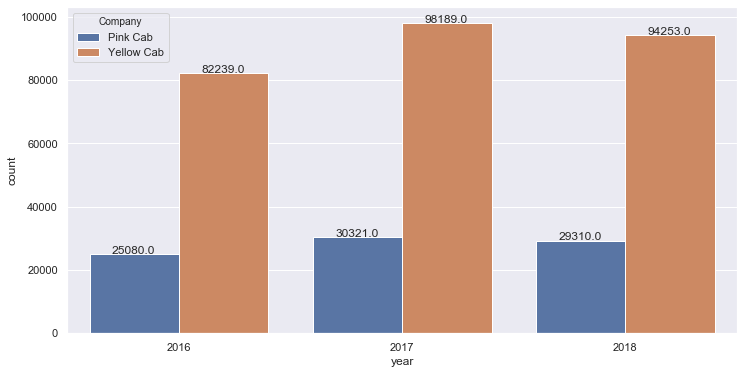

In [62]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x='year', data=cab_data, hue='Company' )
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

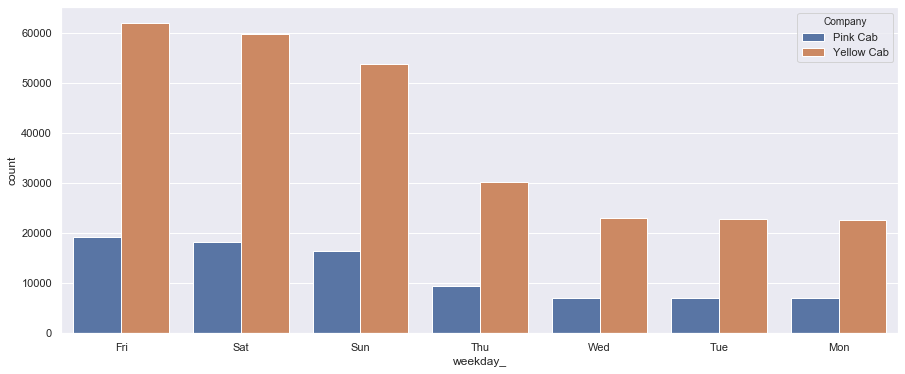

In [63]:
plt.figure(figsize=(15,6))
sns.countplot(x='weekday_',  data=cab_data, hue='Company', order= cab_data['weekday_'].value_counts().index)

### Profit Analysis

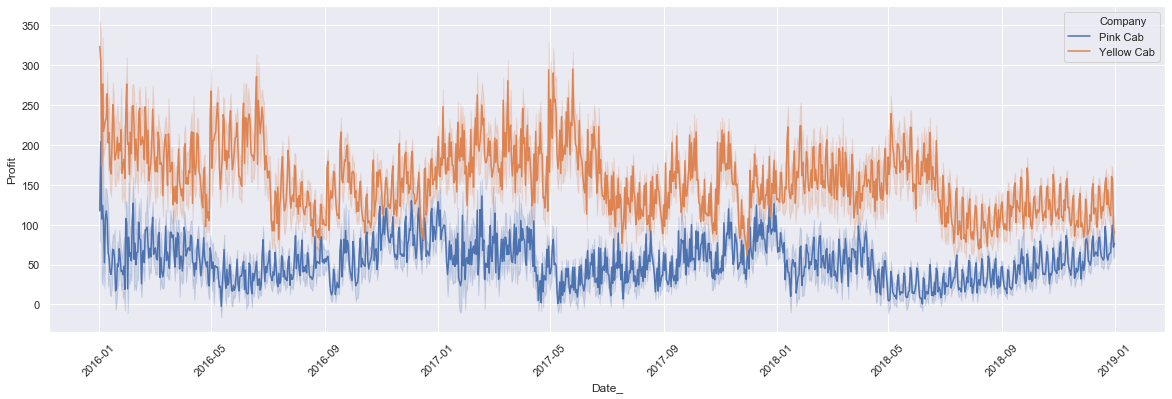

In [64]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
sns.lineplot(x='Date_', y='Profit', data=cab_data, hue='Company')

Text(0.5, 1.0, 'Sum of profit by year for each Company')

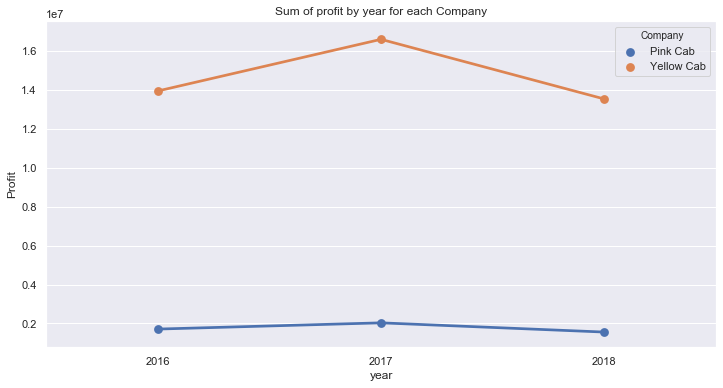

In [65]:
plt.figure(figsize=(12,6))
ax=sns.pointplot(x="year", y='Profit',hue="Company", data=cab_data, estimator= sum)
plt.title("Sum of profit by year for each Company")

In [66]:
YC_pr_dif=((1.657598e+07-1.351740e+07)/ 1.657598e+07)*100
print("Yellow Cab Loss in % = ",  YC_pr_dif)

Yellow Cab Loss in % =  18.451880371477284


In [67]:
PC_pr_dif=((2.033655e+06-1.560162e+06)/2.033655e+06 )*100
print("Pink Cab Loss in % = ", PC_pr_dif)

Pink Cab Loss in % =  23.28285771185378


In [68]:
cab_data.groupby(['Company','year'])['Profit'].sum()

Company     year
Pink Cab    2016    1.713511e+06
            2017    2.033655e+06
            2018    1.560162e+06
Yellow Cab  2016    1.392700e+07
            2017    1.657598e+07
            2018    1.351740e+07
Name: Profit, dtype: float64

Text(0.5, 1.0, 'Yearly Profit Analysis')

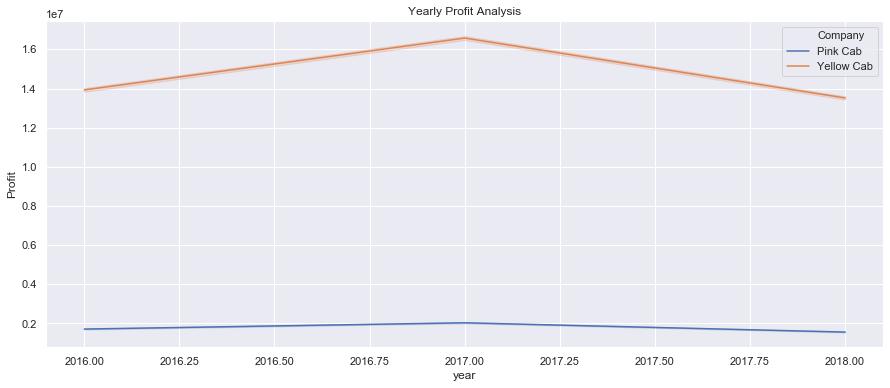

In [69]:
plt.figure(figsize=(15,6))
sns.lineplot(x='year', y='Profit', data=cab_data, hue='Company',estimator='sum')
plt.title("Yearly Profit Analysis")
# in this chart we can easily notice the yearly profit per each company 

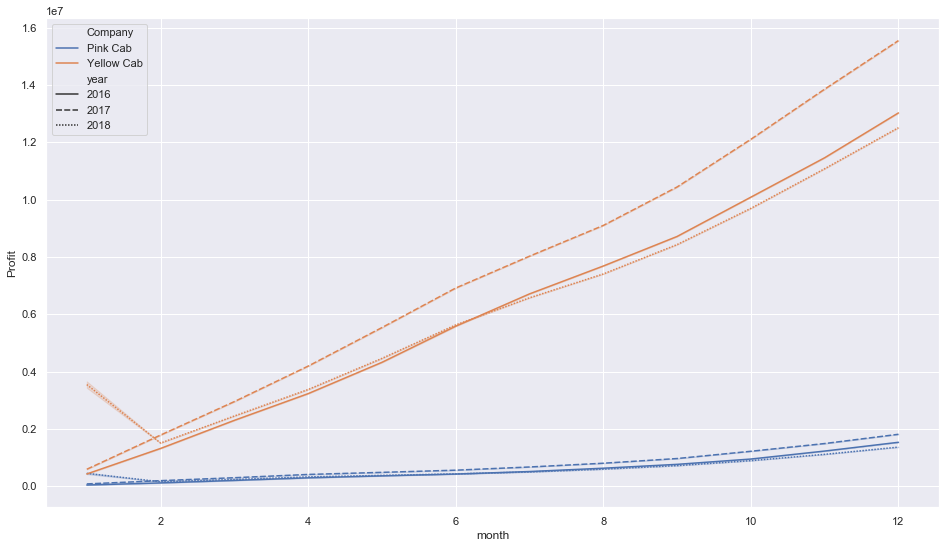

In [70]:
plt.figure(figsize=(16,9))
sns.lineplot(x='month', y=cab_data.groupby(['Company', 'year'])['Profit'].cumsum(), data=cab_data, hue='Company',style='year')
# here we can see the yearly cumsum of profit for the two companies for differnt years

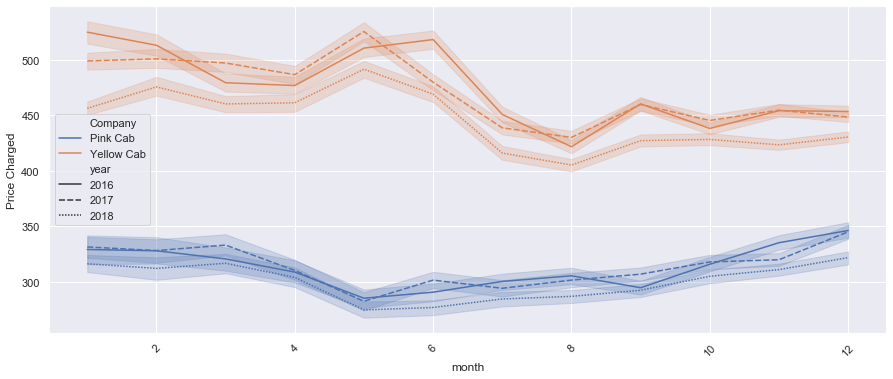

In [71]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
sns.lineplot(x='month', y='Price Charged', data=cab_data, hue='Company',style='year')

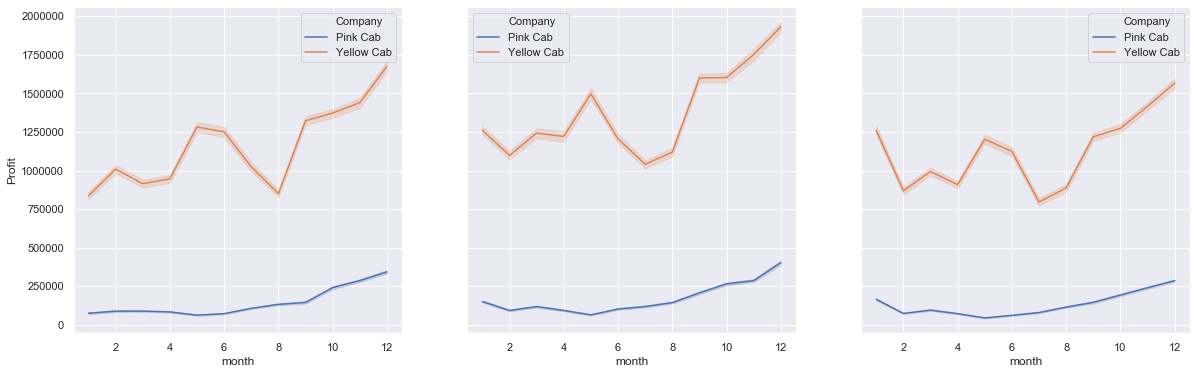

In [72]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(20,6), sharey=True)
sns.lineplot(x='month', y= 'Profit', data=cab_data.query("year==2017"), estimator='sum',hue='Company', ax=ax2)
sns.lineplot(x='month', y= 'Profit', data=cab_data.query("year==2018"), estimator='sum',hue='Company', ax=ax3)
sns.lineplot(x='month', y= 'Profit', data=cab_data.query("year==2016"), estimator='sum',hue='Company', ax=ax1)


In [73]:
cab_data.groupby(['Company', 'year'])['Profit'].cumsum()

0         5.731500e+01
1         8.098100e+01
2         1.085490e+02
3         1.343470e+02
4         1.511910e+02
              ...     
359387    1.351726e+07
359388    1.351727e+07
359389    1.351735e+07
359390    1.351739e+07
359391    1.351740e+07
Name: Profit, Length: 359392, dtype: float64

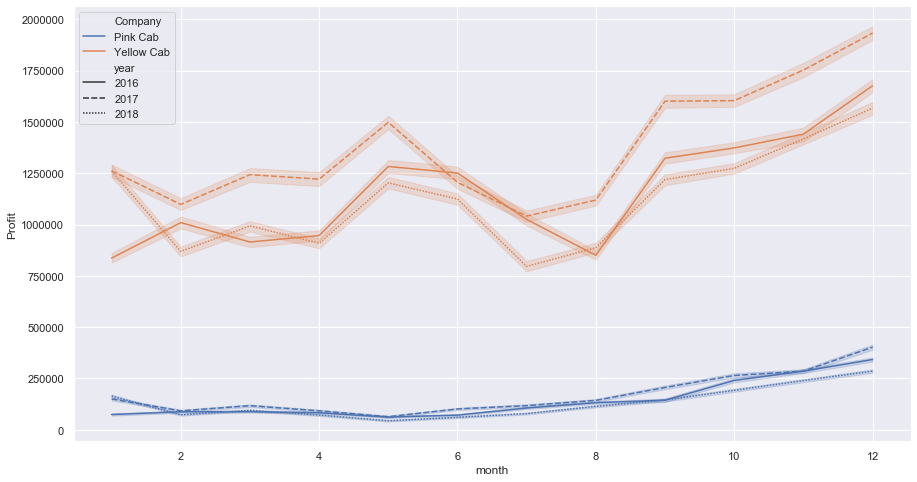

In [74]:
plt.figure(figsize=(15,8))
sns.lineplot(x='month', y=cab_data['Profit'], data=cab_data, hue='Company',style='year', estimator='sum')


In [75]:
test=cab_data.groupby('Company')['day'].value_counts()
test

Company     day
Pink Cab    17     3196
            10     3172
            3      3124
            24     3102
            5      3033
                   ... 
Yellow Cab  4      8322
            11     7996
            18     7875
            25     7865
            31     5349
Name: day, Length: 62, dtype: int64

In [76]:
test1=cab_data.groupby(['Company', 'day'])['day'].value_counts()
test1

Company     day  day
Pink Cab    1    1      2875
            2    2      2664
            3    3      3124
            4    4      2560
            5    5      3033
                        ... 
Yellow Cab  27   27     8911
            28   28     8539
            29   29     8863
            30   30     8371
            31   31     5349
Name: day, Length: 62, dtype: int64

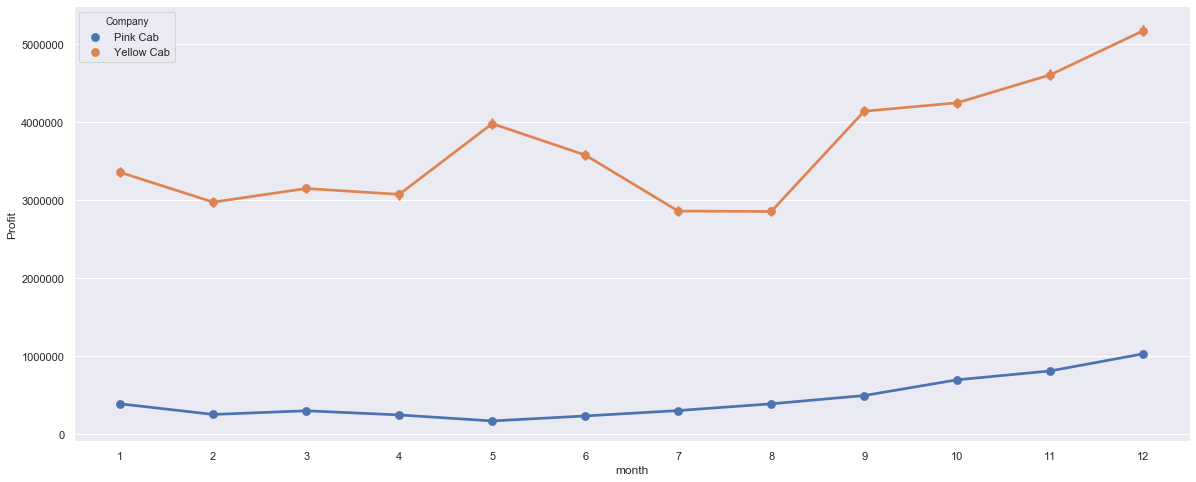

In [77]:
f,ax=plt.subplots(figsize=(20,8))
sns.pointplot(x="month", y="Profit", hue="Company", data=cab_data,ax=ax, estimator=sum)
plt.show()

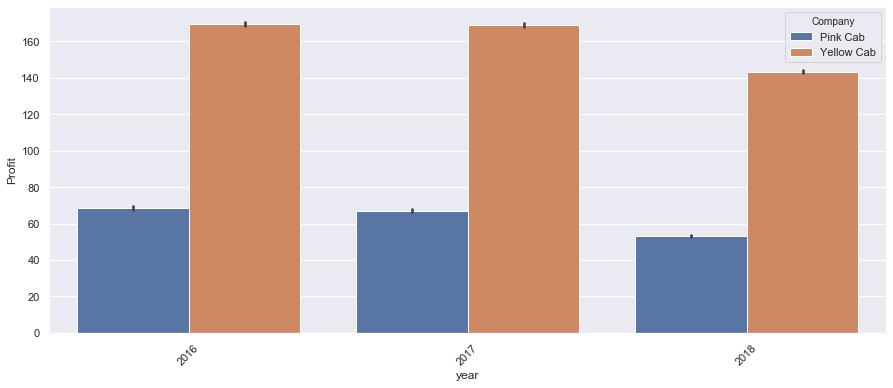

In [78]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
sns.barplot(x='year', y='Profit', data=cab_data, hue='Company')

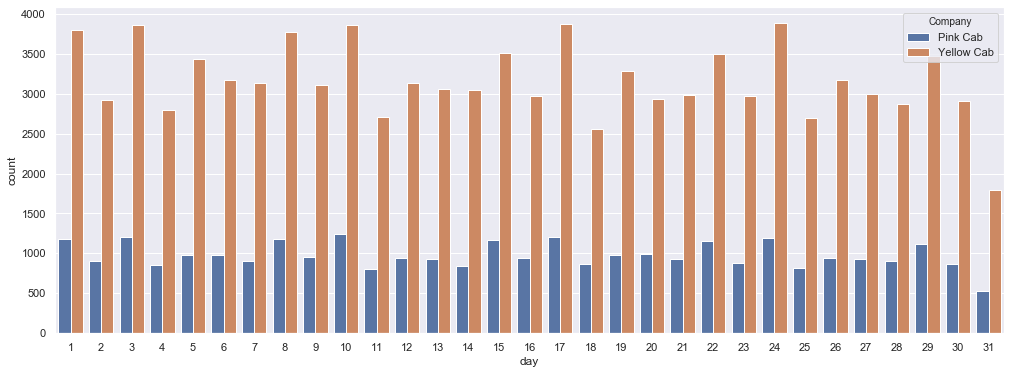

In [79]:
plt.figure(figsize=(17,6))
sns.countplot(x='day',data=cab_data.query("year==2017"), hue='Company')

### Creating Master Data

In [80]:
merge1=pd.merge(customer_id, transaction_id, how="left", on=['Customer ID'] )
merge1.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card


In [81]:
merge1.shape

(440098, 6)

In [82]:
merge2=pd.merge(merge1, cab_data,how="left", on=['Transaction ID'])
merge2.shape

(440098, 19)

In [83]:
master_data=pd.merge(merge2, city, how="left", on=['City'])
# Checkpoint for our master data 

In [84]:
# merge 3 is the same as the master data 
merge3=pd.merge(merge2, city, how="left", on=['City'])

In [85]:
merge3=merge3.drop(['Date of Travel'], axis=1)

In [86]:
merge3.isnull().sum()
# we have 80706 missing values for the features related to the descriptions of each trip. 

Customer ID               0
Gender                    0
Age                       0
Income (USD/Month)        0
Transaction ID            0
Payment_Mode              0
Company               80706
City                  80706
KM Travelled          80706
Price Charged         80706
Cost of Trip          80706
Profit                80706
Date_                 80706
month                 80706
day                   80706
year                  80706
weekday               80706
weekday_              80706
Population            80706
Users                 80706
percent_users         80706
dtype: int64

In [87]:
merge3['Customer ID'].nunique()

49171

In [88]:
# For now we Created our master Data but it's not clean yet.
merge3_cl=merge3.dropna(axis=0)
merge3_cl.describe(include='all')

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Company,City,KM Travelled,Price Charged,...,Profit,Date_,month,day,year,weekday,weekday_,Population,Users,percent_users
count,359392.000000,359392,359392.000000,359392.000000,3.593920e+05,359392,359392,359392,359392.000000,359392.000000,...,359392.000000,359392,359392.000000,359392.000000,359392.000000,359392.000000,359392,3.593920e+05,359392.000000,359392.000000
unique,NaN,2,NaN,NaN,NaN,2,2,19,NaN,NaN,...,NaN,1095,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,Card,Yellow Cab,NEW YORK NY,NaN,NaN,...,NaN,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,Fri,NaN,NaN,NaN
freq,NaN,205912,NaN,NaN,NaN,215504,274681,99885,NaN,NaN,...,NaN,2022,NaN,NaN,NaN,NaN,81402,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2016-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2018-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,19191.652115,NaN,35.336705,15048.822937,1.022076e+07,NaN,NaN,NaN,22.567254,423.443311,...,137.253198,NaN,7.500434,15.628447,2017.045199,3.750620,NaN,3.132198e+06,158365.582267,10.668662
std,21012.412463,NaN,12.594234,7969.409482,1.268058e+05,NaN,NaN,NaN,12.233526,274.378911,...,160.311840,NaN,3.445095,8.827151,0.800239,1.858849,NaN,3.315194e+06,100850.051020,10.633114
min,1.000000,NaN,18.000000,2000.000000,1.000001e+07,NaN,NaN,NaN,1.900000,15.600000,...,-220.060000,NaN,1.000000,1.000000,2016.000000,0.000000,NaN,2.489680e+05,3643.000000,0.649683
25%,2705.000000,NaN,25.000000,8424.000000,1.011081e+07,NaN,NaN,NaN,12.000000,206.437500,...,28.012000,NaN,5.000000,8.000000,2016.000000,3.000000,NaN,6.712380e+05,80021.000000,3.594514


In [89]:
print(" we have the descriptions of ",merge3_cl['Customer ID'].nunique(), "different customers" )
print("and these 80706 trips without descriptions have been made by ", 49171-46148, "different customers")

 we have the descriptions of  46148 different customers
and these 80706 trips without descriptions have been made by  3023 different customers


In [90]:
Master_data= merge3_cl.copy()

#### Assume that the trips of these 3023 customers are distributed like the other trips among the years. I recommand to get the descriptions of these amount of trips, because if the majority of these trips have been made by Pink Cab users and in the last years. Hence it may enhance the statistics of the Pink Cab company in terms of profits and nb. of customers so we may change our decision. (e.g: if 75000 refer to Pink Cab with 2500 more customers to Pink Cab of majority in 2018, it may changes the gowth numbers and we may invest in Pink Cab instead)
### After creating the cleaned Master_data, creating sub data in order to see the number of customers of each company years against the years

### Number of Customers Analysis

In [91]:
yellow_cab1=merge3_cl[merge3_cl['Company']=="Yellow Cab"]

In [92]:
pink_cab1=merge3_cl[merge3_cl['Company']=="Pink Cab"]

In [93]:
yellow_cab1.groupby('year')['Customer ID'].nunique()

year
2016.0    25937
2017.0    27789
2018.0    27470
Name: Customer ID, dtype: int64

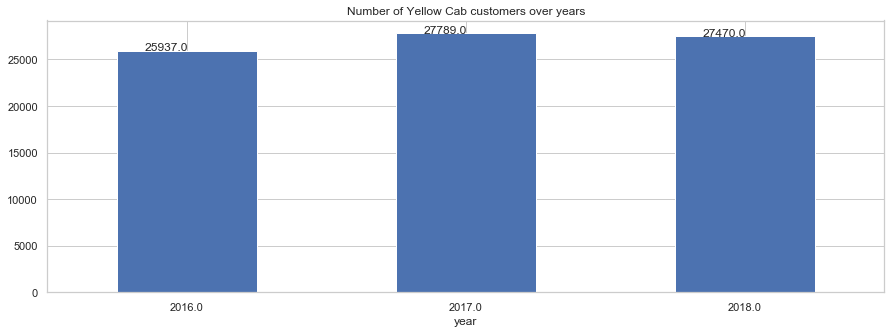

In [94]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
ax=yellow_cab1.groupby('year')['Customer ID'].nunique().plot(kind='bar')
plt.xticks(rotation=0)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.title("Number of Yellow Cab customers over years")
plt.show()

In [95]:
pink_cab1.groupby('year')['Customer ID'].nunique()

year
2016.0    16661
2017.0    18643
2018.0    18400
Name: Customer ID, dtype: int64

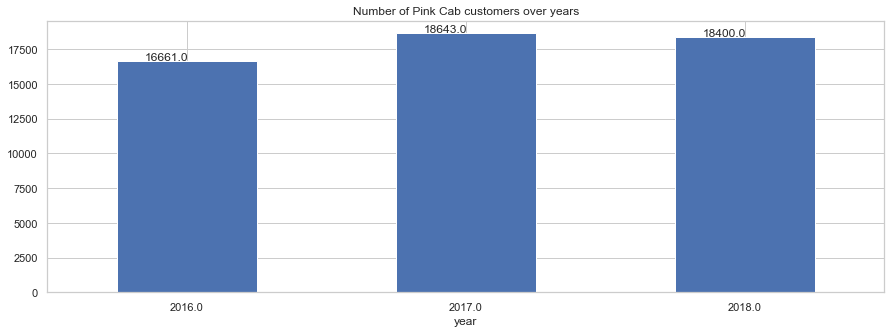

In [96]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
ax=pink_cab1.groupby('year')['Customer ID'].nunique().plot(kind='bar')
plt.xticks(rotation=0)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.title("Number of Pink Cab customers over years")
plt.show()

In [97]:
pink_cab1['Customer ID'].nunique()

32330

### Gender and Age Analysis

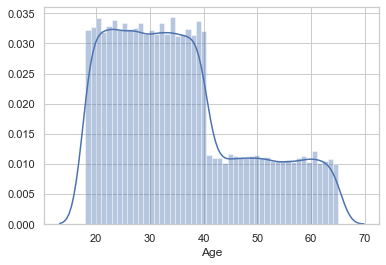

In [98]:
yellow_cab_cust=yellow_cab1.drop_duplicates(subset="Customer ID")
sns.distplot(yellow_cab_cust['Age'])

In [99]:
pink_cab_cust=pink_cab1.drop_duplicates(subset="Customer ID")
pink_cab_cust['Age'].describe()

count    32330.000000
mean        35.368791
std         12.636121
min         18.000000
25%         25.000000
50%         33.000000
75%         42.000000
max         65.000000
Name: Age, dtype: float64

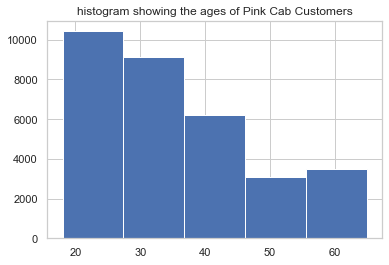

In [100]:
sns.set_style("whitegrid")
pink_cab_cust["Age"].hist(bins=5)
plt.title("histogram showing the ages of Pink Cab Customers")
plt.show()

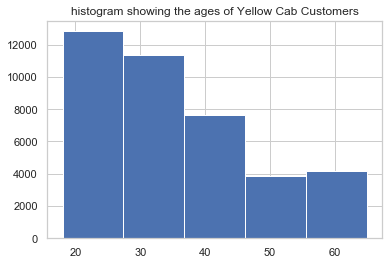

In [101]:
sns.set_style("whitegrid")
plt.title("histogram showing the ages of Yellow Cab Customers")
yellow_cab_cust["Age"].hist(bins=5)
plt.show()

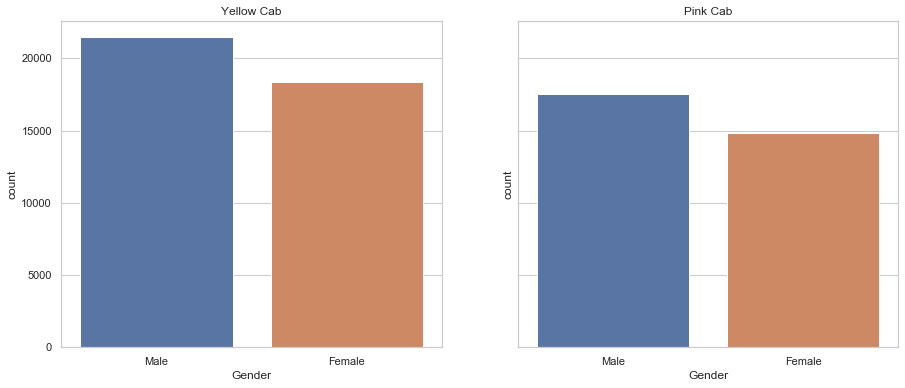

In [102]:
fig, axes= plt.subplots(1,2, figsize=(15,6), sharey=True)

sns.countplot(yellow_cab_cust['Gender'],ax=axes[0])
axes[0].set_title("Yellow Cab")

sns.countplot( pink_cab_cust['Gender'] , ax=axes[1])
axes[1].set_title("Pink Cab")
plt.show()

In [103]:
y_cust=yellow_cab1.groupby('Customer ID').agg({'Profit': 'mean'}).reset_index()
y_cust.head()
# Avg profit per customer of Yellow Cab

,Customer ID,Profit
0,1,302.024032
1,2,315.858367
2,3,274.855880
3,4,314.821424
4,5,404.836243


In [104]:
y_cust_avpr= pd.merge(y_cust, customer_id, on=['Customer ID'], how='left')
y_cust_avpr.info()
# Adding Customers description of Yellow Cab (to plot the avg profit against income)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39896 entries, 0 to 39895
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         39896 non-null  int64  
 1   Profit              39896 non-null  float64
 2   Gender              39896 non-null  object 
 3   Age                 39896 non-null  int64  
 4   Income (USD/Month)  39896 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.8+ MB


In [105]:
p_cust=pink_cab1.groupby('Customer ID').agg({'Profit': 'mean'}).reset_index()
p_cust.head()
# Avg profit per customer of Pink Cab

,Customer ID,Profit
0,1,218.291000
1,2,150.102500
2,3,111.014500
3,4,177.325000
4,5,72.147125


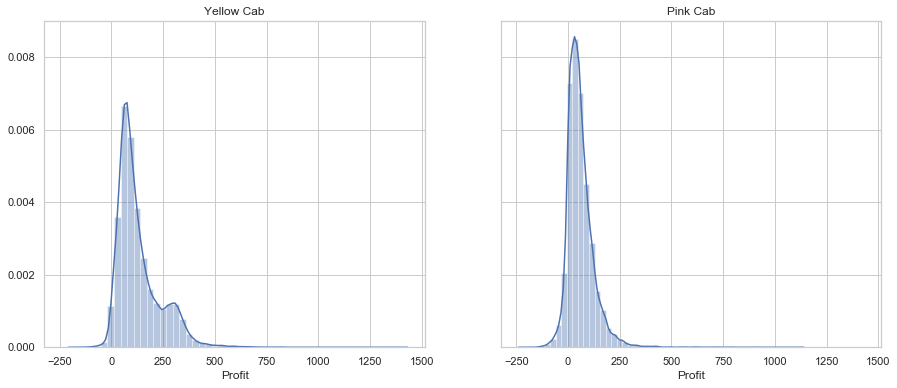

we can see that the pink cab company has more skewness to the negative side than the yellow cab, and most of 


In [106]:
fig, axes= plt.subplots(1,2, figsize=(15,6),sharey=True,sharex=True)
sns.distplot(y_cust['Profit'], ax=axes[0])
axes[0].set_title("Yellow Cab")
sns.distplot(p_cust['Profit'],ax=axes[1])
axes[1].set_title("Pink Cab")
plt.show()
print("we can see that the pink cab company has more skewness to the negative side than the yellow cab, and most of ")

In [107]:
p_cust_avpr= pd.merge(p_cust, customer_id, on=['Customer ID'], how='left')
p_cust_avpr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32330 entries, 0 to 32329
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         32330 non-null  int64  
 1   Profit              32330 non-null  float64
 2   Gender              32330 non-null  object 
 3   Age                 32330 non-null  int64  
 4   Income (USD/Month)  32330 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.5+ MB


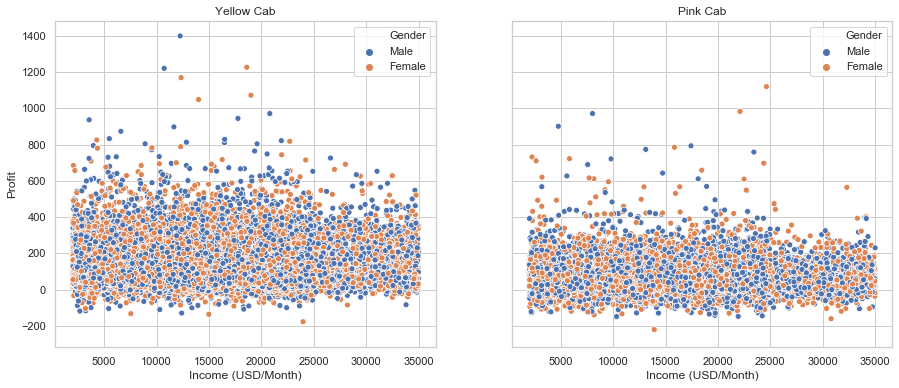

In [108]:
fig, axes= plt.subplots(1,2, figsize=(15,6),sharey=True)

sns.scatterplot(y='Profit',x='Income (USD/Month)',  data=y_cust_avpr, hue='Gender',ax=axes[0])
axes[0].set_title("Yellow Cab")

sns.scatterplot(y='Profit',x='Income (USD/Month)',  data=p_cust_avpr, hue='Gender',ax=axes[1])
axes[1].set_title("Pink Cab")
plt.show()


In [109]:
y_cust['Customer ID'].nunique()

39896

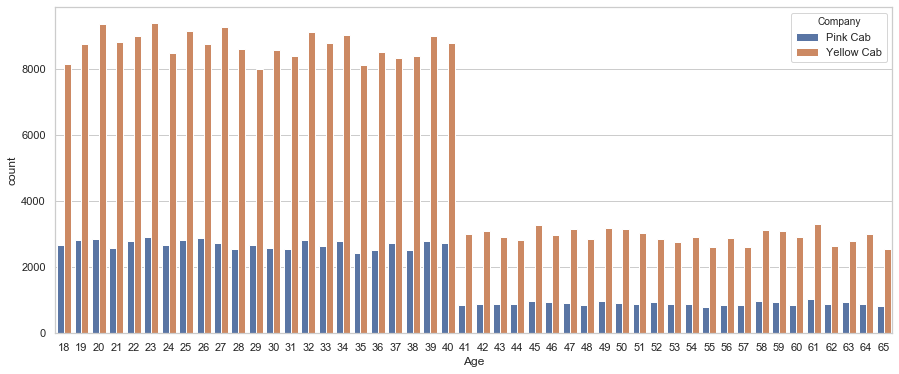

In [110]:
plt.figure(figsize=(15,6))
sns.countplot(merge3_cl['Age'], hue=merge3_cl['Company'])

plt.show()

In [111]:
yellow_cab1['Gender'].value_counts()

Male      158681
Female    116000
Name: Gender, dtype: int64

In [112]:
merge2_cl=merge2.dropna(axis=0)
merge2_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 440097
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Customer ID         359392 non-null  int64         
 1   Gender              359392 non-null  object        
 2   Age                 359392 non-null  int64         
 3   Income (USD/Month)  359392 non-null  int64         
 4   Transaction ID      359392 non-null  int64         
 5   Payment_Mode        359392 non-null  object        
 6   Date of Travel      359392 non-null  float64       
 7   Company             359392 non-null  object        
 8   City                359392 non-null  object        
 9   KM Travelled        359392 non-null  float64       
 10  Price Charged       359392 non-null  float64       
 11  Cost of Trip        359392 non-null  float64       
 12  Profit              359392 non-null  float64       
 13  Date_               359392 no

In [113]:
women=merge2_cl[merge2_cl['Gender']=='Female']
women.info()
#we have about 40% of Transactions made by Female Customers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153480 entries, 77759 to 440097
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Customer ID         153480 non-null  int64         
 1   Gender              153480 non-null  object        
 2   Age                 153480 non-null  int64         
 3   Income (USD/Month)  153480 non-null  int64         
 4   Transaction ID      153480 non-null  int64         
 5   Payment_Mode        153480 non-null  object        
 6   Date of Travel      153480 non-null  float64       
 7   Company             153480 non-null  object        
 8   City                153480 non-null  object        
 9   KM Travelled        153480 non-null  float64       
 10  Price Charged       153480 non-null  float64       
 11  Cost of Trip        153480 non-null  float64       
 12  Profit              153480 non-null  float64       
 13  Date_               15348

In [114]:
women.groupby('City')['Company'].value_counts()

City            Company   
ATLANTA GA      Yellow Cab     2840
                Pink Cab        884
AUSTIN TX       Yellow Cab     1470
                Pink Cab        927
BOSTON MA       Yellow Cab    10807
                Pink Cab       2356
CHICAGO IL      Yellow Cab    18383
                Pink Cab       3605
DALLAS TX       Yellow Cab     2722
                Pink Cab        644
DENVER CO       Yellow Cab     1197
                Pink Cab        653
LOS ANGELES CA  Yellow Cab    12123
                Pink Cab       8666
MIAMI FL        Yellow Cab     2245
                Pink Cab        972
NASHVILLE TN    Pink Cab        861
                Yellow Cab      569
NEW YORK NY     Yellow Cab    33973
                Pink Cab       5578
ORANGE COUNTY   Yellow Cab     1183
                Pink Cab        765
PHOENIX AZ      Yellow Cab      581
                Pink Cab        439
PITTSBURGH PA   Pink Cab        367
                Yellow Cab      305
SACRAMENTO CA   Pink Cab        683
 

In [115]:
merge2_cl[merge2_cl['City'].isin(['NASHVILLE TN','PITTSBURGH PA','SACRAMENTO CA','SAN DIEGO CA'])].groupby(['City', 'Company'])['Gender'].value_counts()

City           Company     Gender
NASHVILLE TN   Pink Cab    Male       980
                           Female     861
               Yellow Cab  Male       600
                           Female     569
PITTSBURGH PA  Pink Cab    Female     367
                           Male       315
               Yellow Cab  Male       326
                           Female     305
SACRAMENTO CA  Pink Cab    Female     683
                           Male       651
               Yellow Cab  Male       525
                           Female     508
SAN DIEGO CA   Pink Cab    Male      5655
                           Female    5017
               Yellow Cab  Male      5211
                           Female    4605
Name: Gender, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

<Figure size 1080x360 with 0 Axes>

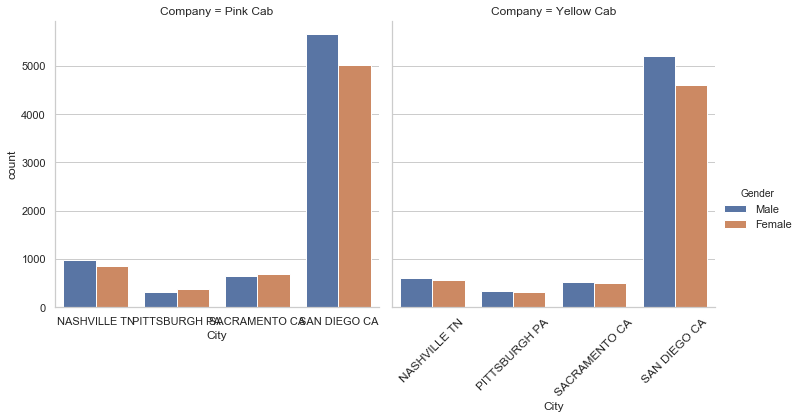

In [116]:
plt.figure(figsize=(15,5))
ax=sns.catplot(x='City', hue='Gender', col='Company',data=merge2_cl[merge2_cl['City'].isin(['NASHVILLE TN','PITTSBURGH PA','SACRAMENTO CA','SAN DIEGO CA'])], kind='count')
plt.xticks(
    rotation=45, 
    fontsize='medium'  )
# Number of transactions for each seperated by the gender of the customer by cities.Where Pink Cab is dominant

#### We can infer from these charts above that the Gender and the Age are almost similarly distributed for the 2 companies.

In [117]:
merge2_cl["Income (USD/Month)"].describe()

count    359392.000000
mean      15048.822937
std        7969.409482
min        2000.000000
25%        8424.000000
50%       14685.000000
75%       21035.000000
max       35000.000000
Name: Income (USD/Month), dtype: float64

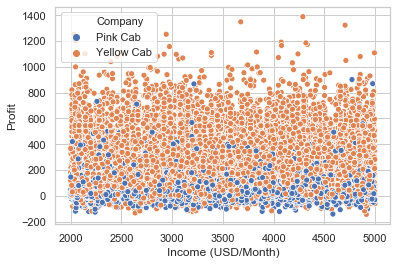

In [118]:
sns.scatterplot(y='Profit',x='Income (USD/Month)', hue='Company', data=merge2_cl[merge2_cl['Income (USD/Month)']< 5000])

In [119]:
s=merge2_cl.groupby('Date_')['Customer ID'].value_counts()
s.groupby('Date_').sum()

Date_
2016-01-02    181
2016-01-03    178
2016-01-04     25
2016-01-05     47
2016-01-06    109
             ... 
2018-12-27    318
2018-12-28    843
2018-12-29    825
2018-12-30    257
2018-12-31    256
Name: Customer ID, Length: 1095, dtype: int64

In [120]:
s=merge2_cl.groupby(['Date_','Customer ID'])['Transaction ID'].value_counts()
s.groupby('Date_').sum()

Date_
2016-01-02    181
2016-01-03    178
2016-01-04     25
2016-01-05     47
2016-01-06    109
             ... 
2018-12-27    318
2018-12-28    843
2018-12-29    825
2018-12-30    257
2018-12-31    256
Name: Transaction ID, Length: 1095, dtype: int64

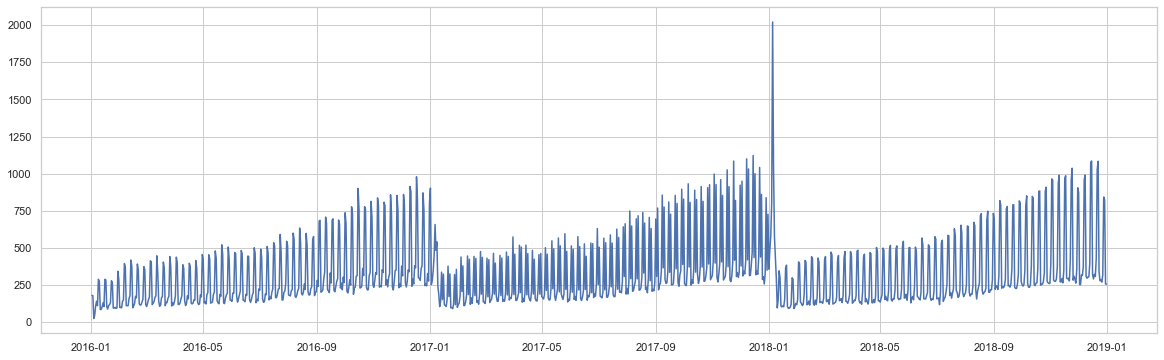

In [121]:
plt.figure(figsize=(20,6))
plt.plot(s.groupby('Date_').sum())

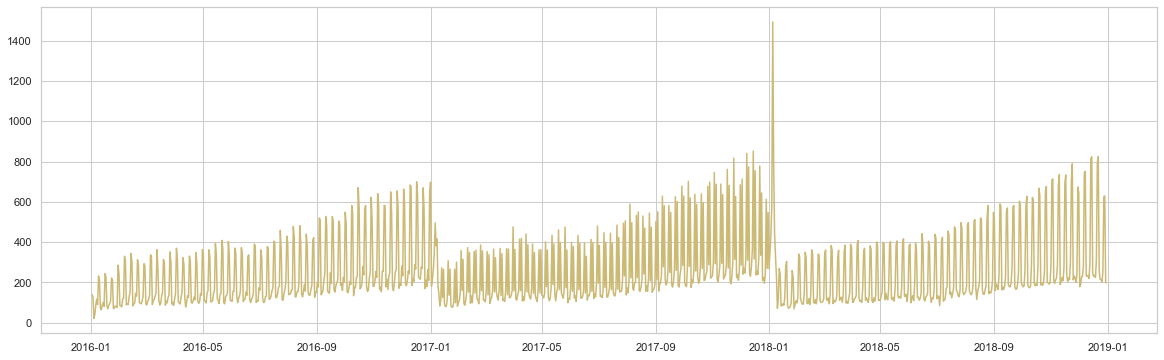

In [122]:
plt.figure(figsize=(20,6))
yellow_cab2=merge2_cl[merge2_cl['Company']=="Yellow Cab"]
s1=yellow_cab2.groupby('Date_')['Transaction ID'].value_counts()
s1.groupby('Date_').sum()
plt.plot(s1.groupby('Date_').sum(),c='y')
# yellow cab

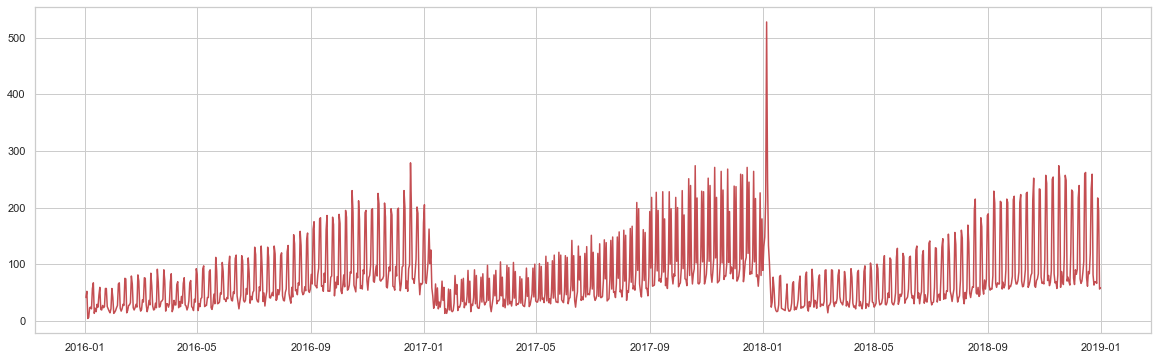

In [123]:
plt.figure(figsize=(20,6))
pink_cab2=merge2_cl[merge2_cl['Company']=="Pink Cab"]
s2=pink_cab2.groupby('Date_')['Transaction ID'].value_counts()
s2.groupby('Date_').sum()
plt.plot(s2.groupby('Date_').sum(), c='r')

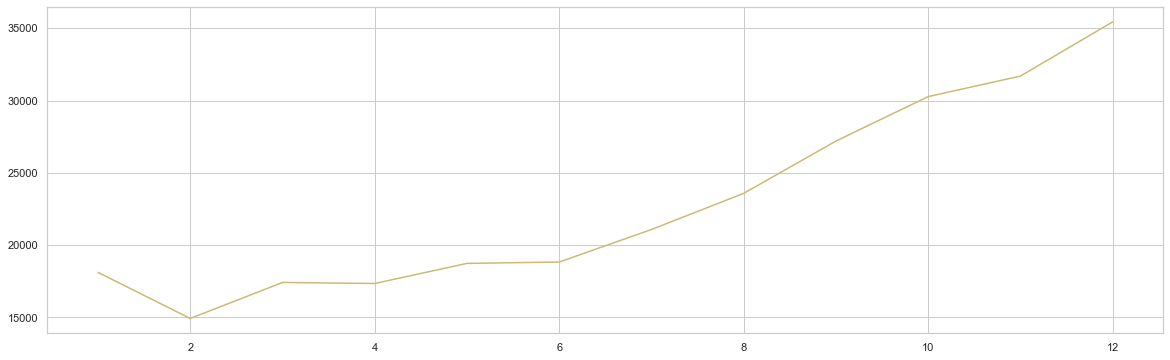

In [124]:
# Counting using lineplot we could put it in the first section in Data Analysis
plt.figure(figsize=(20,6))
pink_cab2=merge3_cl[merge2_cl['Company']=="Yellow Cab"]
s2=pink_cab2.groupby('month')['Transaction ID'].value_counts()
s2.groupby('month').sum()
plt.plot(s2.groupby('month').sum(), c='y')

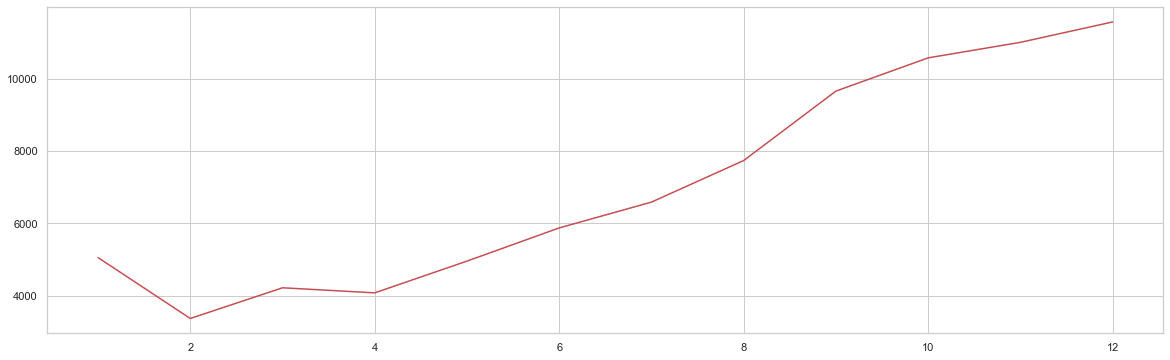

In [125]:
plt.figure(figsize=(20,6))
pink_cab2=merge3_cl[merge2_cl['Company']=="Pink Cab"]
s2=pink_cab2.groupby('month')['Transaction ID'].value_counts()
s2.groupby('month').sum()
plt.plot(s2.groupby('month').sum(), c='r')

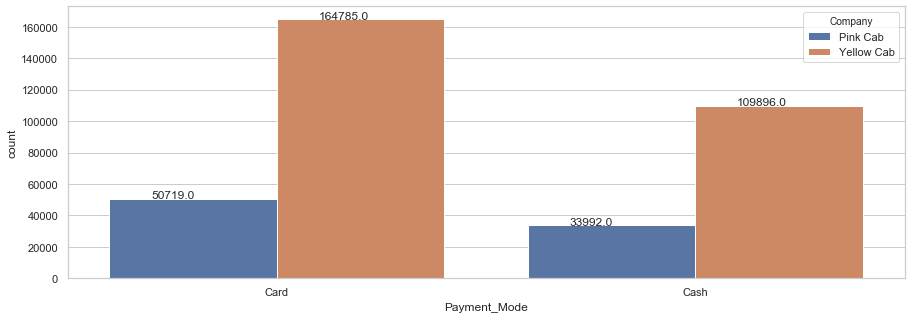

In [126]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x='Payment_Mode', hue='Company', data=merge3_cl)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))